In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [48]:
# function to calculate l-distance between two strings
# accepts two string parameters: 
def ldistance(strA, strB):
    import numpy as np # to create matrix
    
    #setting up matrix
    size_x = len(strA) + 1
    size_y = len(strB) + 1
    matrix = np.zeros((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y
    
    #populating matrix
    for x in range(1, size_x):
        for y in range(1, size_y):
            if strA[x-1] == strB[y-1]: #elements are equal
                matrix[x][y] = matrix[x-1][y-1]
            else: 
                a = matrix[x][y-1]
                b = matrix[x-1][y]
                c = matrix[x-1][y-1]
                if (a <= b and a <= c):
                    matrix[x][y] = a + 1
                elif (b <= a and b <= c):
                    matrix[x][y] = b + 1
                else:
                    matrix[x][y] = c + 1
        

                    
    # bottom-right element is l-distance
    distance = matrix[-1][-1]
    
    # printing
    #for t1 in range(size_x):
        #for t2 in range(size_y ):
            #print(int(matrix[t1][t2]), end=" ")
        #print()
        
    #taking into consideration the length of the words
    length = 0
    if ((len(strA) > len(strB)) or (len(strA) == len(strB))):
        length = len(strA)
    else:
        length = len(strB)
        
    lscore = ((length - distance) / length) 
    
    return lscore

In [49]:
# function to remove vowels, common words, numbers, and punctuation, as well as stem the words
# accepts 2 parameters: string for sample and string for language
def clean_sample(sample, language):
    import nltk 
    import re # to use in regular expressions
    from nltk.stem.snowball import SnowballStemmer # to stem words, doesn't work well
    from nltk.corpus import stopwords # to remove common words
    
    # creating objects for stemmer, common words and key for punctuation/numbers to be removed
    stemmer = SnowballStemmer(str(language))
    common_words = stopwords.words(language)
    toRemove = re.compile(r"[aeiou0-9,@\?\.$%_/:()]")

    # separates sentence into elements and stores in elemList
    elemList=sample.split()
    
    # stemming first
    stems=[]
    for elem in elemList:
        if elem not in common_words:
            w = stemmer.stem(elem)
            stems.append(w)

    #now removing punctuation, numbers, vowels and storing in wordList
    wordList=[]
    for i in stems:
        s = i
        elem = re.sub(toRemove, "", s.lower())
        wordList.append(elem)
    
    # stems words and appends them to list to be returned
    return wordList

In [50]:
# function that lines up pairs of words between the two samples, and calculates their l-distance
# parameters: 2 lists of words from each sample, 1 list of manually-created alignment between the two lists
def measure_samples(list1, list2, alignment):
    distances=[]
    
    # aligning pairs
    for i in range(len(alignment)):
        idx1 = alignment[i][0]
        idx2 = alignment[i][1]
        str1 = list1[idx1]
        str2 = list2[idx2]
        print(str1 + "-" + str2)
        l = ldistance(str(str1), str(str2))
        distances.append(l)
        
    return distances

In [51]:
import nltk
from nltk.translate import Alignment
engSample = "Guided by the purposes and principles of the Charter of the United Nations, and expressing in particular the need to achieve international cooperation in promoting and encouraging respect for human rights and fundamental freedoms for all without distinction"
spaSample = "Guiado por los propósitos y principios de la Carta de las Naciones Unidas, y expresando en particular la necesidad de lograr la cooperación internacional para promover y alentar el respeto de los derechos humanos y las libertades fundamentales para todos sin distinción"

#Removing vowels, punctuation, stemming
engWords = clean_sample(engSample, "english")
spaWords = clean_sample(spaSample, "spanish")

#Manually transcribing sentence alignment to compare word-to-word
print("Spa-Eng Pairs\n")
eng_spa_align = [(0,0), (1,1), (2,2), (3,3), (4,5), (5,4), (6, 6), (7,7), (8,8), (9,9), (10, 11), (11, 10), (12, 12), (13, 13), (14, 14), (15, 16), (16, 15), (18, 17), (17, 18), (20, 19)]


#Passing lists of consonant-only words in both languages and their alignment to Ldistnance method
measures = measure_samples(engWords, spaWords, eng_spa_align)
print("\n")
print("English consonants\n")
print(engWords)
print("\n")
print("Spanish consonants\n")
print(spaWords)
print("\n")
print("L-Distance measures per pair of aligned words\n")
print(measures)
print("\n")

print("Average")
avg = 0
for i in range(len(measures)):
    avg = avg + measures[i]
avg/len(measures)

Spa-Eng Pairs

gd-g
prps-prpst
prncpl-prncp
chrtr-crt
nt-nds
ntns-ncn
xprss-xprs
prtclr-prtcl
nd-ncs
chv-lgr
ntrn-ntrncnl
cpr-cpr
prmt-prmv
ncrg-lnt
rspct-rspt
hmn-hmn
rght-drch
frdm-lbrtd
fndmnt-fndmntl
dstnct-dstncn


English consonants

['gd', 'prps', 'prncpl', 'chrtr', 'nt', 'ntns', 'xprss', 'prtclr', 'nd', 'chv', 'ntrn', 'cpr', 'prmt', 'ncrg', 'rspct', 'hmn', 'rght', 'fndmnt', 'frdm', 'wtht', 'dstnct']


Spanish consonants

['g', 'prpst', 'prncp', 'crt', 'ncn', 'nds', 'xprs', 'prtcl', 'ncs', 'lgr', 'cpr', 'ntrncnl', 'prmv', 'lnt', 'rspt', 'drch', 'hmn', 'lbrtd', 'fndmntl', 'dstncn']


L-Distance measures per pair of aligned words

[0.5, 0.8, 0.8333333333333334, 0.6, 0.3333333333333333, 0.5, 0.8, 0.8333333333333334, 0.3333333333333333, 0.0, 0.5714285714285714, 1.0, 0.75, 0.0, 0.8, 1.0, 0.25, 0.2, 0.8571428571428571, 0.8333333333333334]


Average


0.5897619047619048

In [52]:
from transliterate import translit, get_available_language_codes
import nltk
import re
from nltk.translate import Alignment
engSample = "Guided by the purposes and principles of the Charter of the United Nations, and expressing in particular the need to achieve international cooperation in promoting and encouraging respect for human rights and fundamental freedoms for all without distinction"
rusSample = "Руководствуясь целями и принципами Устава Организации Объединенных Наций и выражая в частности необходимость достижения международного сотрудничества в поощрении и поощрении уважения прав человека и основных свобод для всех без различия"
#rusSample = translit(rusSample, 'ru', reversed=True)
engWords = engSample.split()
rusWords = rusSample.split()

#Removing vowels, punctuation, stemming
engWords = clean_sample(engSample, "english")
rusWords = clean_sample(rusSample, "russian")


# transliterating Cyrillic text
print("Rus-Eng Pairs\n")
translitRus=[]
for i in range(len(rusWords)):
    l = translit(rusWords[i], 'ru', reversed=True)
    translitRus.append(l)

# running through clean_sample once more - to remove vowels
translitString=""
for i in range(len(translitRus)):
    translitString+=translitRus[i] + " "
rusFinal = clean_sample(translitString, "russian")
    
# manual alignment
eng_rus_align = [(0,0), (1,1), (2,2), (3,3), (4,6), (5,7), (6,8), (7,7), (8,8), (9,9), (10, 10), (11,11), (12,12), (13,13), (15,14), (14,15), (16,16), (17,17), (19,18)]

#Passing lists of consonant-only words in both languages and their alignment to Ldistnance method
measures = measure_samples(engWords, rusFinal, eng_rus_align)
print("\n")
print("English consonants\n")
print(engWords)
print("\n")
print("Russian consonants\n")
print(rusFinal)
print("\n")
print("L-Distance measures per pair of aligned words\n")
print(measures)
print("\n")

print("Average")
avg = 0
for i in range(len(measures)):
    avg = avg + measures[i]
avg/len(measures)

Rus-Eng Pairs

gd-rkvdstv
prps-tsl
prncpl-prntsp
chrtr-stv
nt-nts
ntns-vyrzh
xprss-chstnst
prtclr-vyrzh
nd-chstnst
chv-nbhdm
ntrn-dstzhn
cpr-mzhdnrdn
prmt-strdnchstv
ncrg-pschrn
hmn-pschrn
rspct-vzhn
rght-prv
fndmnt-chlvk
wtht-snvn


English consonants

['gd', 'prps', 'prncpl', 'chrtr', 'nt', 'ntns', 'xprss', 'prtclr', 'nd', 'chv', 'ntrn', 'cpr', 'prmt', 'ncrg', 'rspct', 'hmn', 'rght', 'fndmnt', 'frdm', 'wtht', 'dstnct']


Russian consonants

['rkvdstv', 'tsl', 'prntsp', 'stv', 'rgnzts', "b'dnn", 'nts', 'vyrzh', 'chstnst', 'nbhdm', 'dstzhn', 'mzhdnrdn', 'strdnchstv', 'pschrn', 'pschrn', 'vzhn', 'prv', 'chlvk', 'snvn', 'svbd', 'rzlch']


L-Distance measures per pair of aligned words

[0.14285714285714285, 0.0, 0.5, 0.2, 0.6666666666666666, 0.0, 0.14285714285714285, 0.0, 0.14285714285714285, 0.2, 0.3333333333333333, 0.125, 0.2, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0]


Average


0.17474937343358396

In [53]:
# use to implement bags method
import nltk
from nltk.translate import Alignment
engSample = "Guided by the purposes and principles of the Charter of the United Nations, and expressing in particular the need to achieve international cooperation in promoting and encouraging respect for human rights and fundamental freedoms for all without distinction"
spaSample = "Guiado por los propósitos y principios de la Carta de las Naciones Unidas, y expresando en particular la necesidad de lograr la cooperación internacional para promover y alentar el respeto de los derechos humanos y las libertades fundamentales para todos sin distinción"
engWords = clean_sample(engSample, "english")
spaWords = clean_sample(spaSample, "spanish")

In [54]:
# use to implement bags method
from transliterate import translit, get_available_language_codes
import nltk
from nltk.translate import Alignment
engSample = "Guided by the purposes and principles of the Charter of the United Nations, and expressing in particular the need to achieve international cooperation in promoting and encouraging respect for human rights and fundamental freedoms for all without distinction"
rusSample = "Руководствуясь целями и принципами Устава Организации Объединенных Наций и выражая, в частности, необходимость достижения международного сотрудничества в поощрении и поощрении уважения прав человека и основных свобод для всех без различия"

#Removing vowels, punctuation, stemming
engWords = clean_sample(engSample, "english")
rusWords = clean_sample(rusSample, "russian")

# transliterating Cyrillic text
print("Rus-Eng Pairs\n")
translitRus=[]
for i in range(len(rusWords)):
    l = translit(rusWords[i], 'ru', reversed=True)
    translitRus.append(l)

# running through clean_sample once more - to remove vowels
translitString=""
for i in range(len(translitRus)):
    translitString+=translitRus[i] + " "
rusFinal = clean_sample(translitString, "russian")

Rus-Eng Pairs



In [55]:
def create_basic_df(aPairingList):
    df = pd.DataFrame(aPairingList)
    return df

In [56]:
# creates a correlation dataframe.
# There must be a better way to do this...
def create_corr_df(aPairingList):
    """This function creates a correlation matrix out of a pairing list.
        A pairing list is structured [[lang1,lang2,ld score],[lang1,lang2,ld score]...]
        The return of the function is a dataframe. Use this correlation df to plug into seaborn's 'HeatMap' method."""
    # get the pairs
    pairs = [i[0:2] for i in aPairingList]
    cols = []
    # get the unique languages
    for i in aPairingList:
        for j in i[0:2]:
            if j not in cols:
                cols.append(j)
                
    # set up an identity matrix df to populate
    identity_data = np.identity(len(cols))
    df = pd.DataFrame(identity_data,columns=cols,index=cols)
    
    # fill the zeros with NaNs -> Not a Number
    # fill bottom left, then transpose
    for i in range(len(cols)-1):
        for j in range(i+1,len(cols)):
            df[df.columns[i]][df.index[j]] = df[df.columns[j]][df.index[i]] = np.NaN
    
    # set the data on the bottom left, then transpose it to top right
    for i in range(len(cols)-1):
        for j in range(i+1,len(cols)):
            #print(cols[i],"-",df.index[j])
            ind = 0
            found = False
            if [cols[i],df.index[j]] in pairs:
                ind = pairs.index([cols[i],df.index[j]])
                found = True
            elif [cols[j],df.index[i]] in pairs:
                ind = pairs.index([cols[j],df.index[i]])
                found = True
            if(found):
                val = aPairingList[ind][-1]
                df[df.columns[i]][df.index[j]] = val
                df[df.columns[j]][df.index[i]] = val
        
    return df

In [60]:
pairing_list = [["English","Spanish",0.7],["Spanish","German",0.3],
                ["Italian","Russian",0.2],["Italian","German",0.5],
                ["Spanish","Italian",0.9],["English","Italian",0.6],
                ["Russian","English",0.1],["English","German",0.4]]

In [61]:
df = create_corr_df(pairing_list)
print(df)

         English  Spanish  German  Italian  Russian
English      1.0      0.7     0.4      0.6      0.1
Spanish      0.7      1.0     0.3      0.9      NaN
German       0.4      0.3     1.0      0.5      NaN
Italian      0.6      0.9     0.5      1.0      0.2
Russian      0.1      NaN     NaN      0.2      1.0


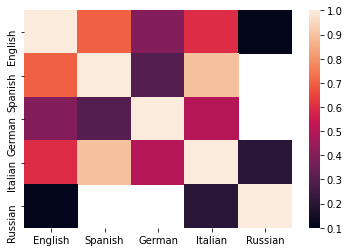

In [62]:
sns.heatmap(df)